## Importing

In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Non Linear Plots

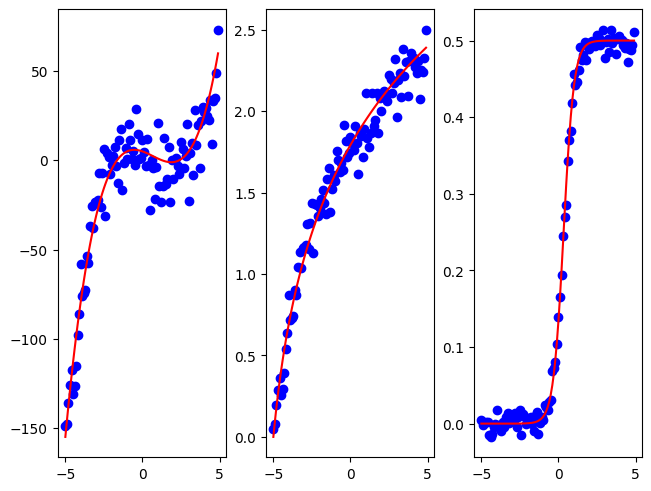

In [171]:
figure, axes = plt.subplots(1, 3, constrained_layout=True)

x = np.arange(-5, 5, 0.1)
noise = np.random.normal(size=x.size)

# S-Curve Plot (Sigmoid)
y = 0.5 / (1 + np.exp(-3 * x + 1))
y_with_noise = y + .01 * noise

axes[2].plot(x, y_with_noise, "bo")
axes[2].plot(x, y, "r")

y = x ** 3 - 2 * (x ** 2) - 3 * x + 5
y_with_noise = y + 12 * noise

axes[0].plot(x, y_with_noise, "bo")
axes[0].plot(x, y, "r")


y = np.log(x + 6)
y_with_noise = y + 0.1 * noise

axes[1].plot(x, y_with_noise, "bo")
axes[1].plot(x, y, "r")

## Reading Data

In [172]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


## Plotting The Dataset
#### GDP cannot be infinite. So its note exponential. It is a S-Curve (Sigmoid).

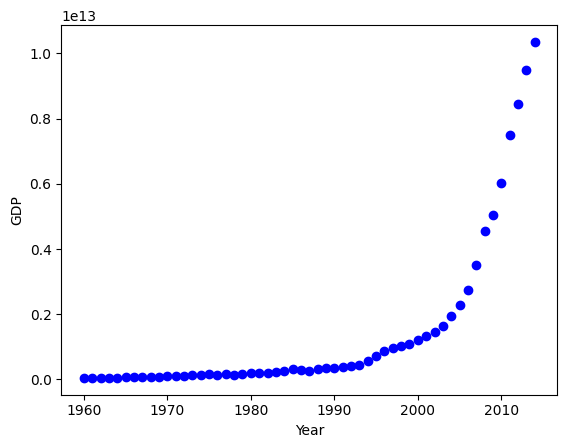

In [173]:
years = df["Year"]
GDPs = df["Value"]

plt.plot(years.values, GDPs.values, "bo")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

## Modeling

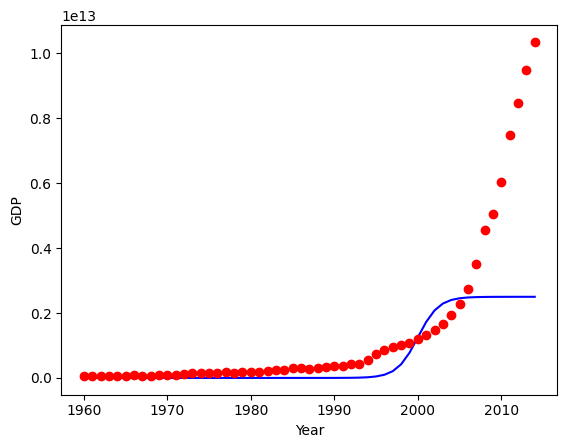

In [174]:
def sigmoid (x, beta1, beta2):
    y = 1 / (1 + np.exp(-beta1 * (x - beta2)))
    return y;

predicted_y = 2500000000000 * sigmoid(years, 0.8, 2000)

plt.plot(years, predicted_y, "b")
plt.plot(years, GDPs, "ro")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

## Normalizing Data

In [175]:
normalized_years = years.values / max(years)
normalized_GDPs = GDPs.values / max(GDPs)

## Non-Linear Regression

beta1 = 690.4517113439442 & beta2 = 0.9972071272528118


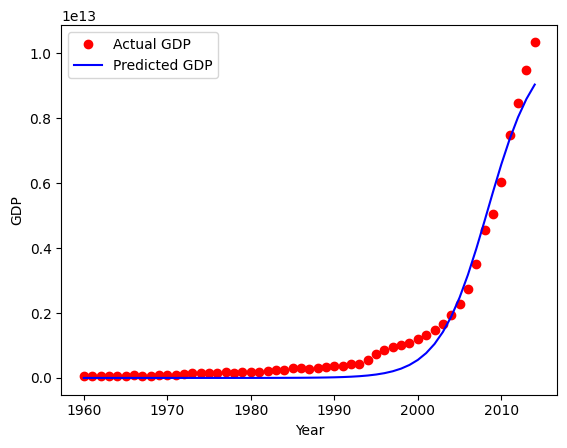

In [176]:
from scipy.optimize import curve_fit

popt, PCO_value = curve_fit(sigmoid, normalized_years, normalized_GDPs) # popt: Optimized Parameters
print(f"beta1 = {popt[0]} & beta2 = {popt[1]}")
# print(PCO_value)

def predict_GDP(years):
    return sigmoid(years, *popt) # *popt = popt[0], popt[1]

plt.plot(years, GDPs, "ro", label="Actual GDP")
plt.plot(years, max(GDPs) * predict_GDP(normalized_years), "b", label="Predicted GDP")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.show()

## Error

In [177]:
from sklearn.metrics import r2_score

predicted_GDPs = max(GDPs) * predict_GDP(normalized_years)

print(f"Residual Sum of Squares: {np.mean((predicted_GDPs - GDPs) ** 2)}")
print(f"R2-Score (between 0 and 1, 1 is ideal): {r2_score(GDPs, predicted_GDPs)}")

Residual Sum of Squares: 1.6689161627330574e+23
R2-Score (between 0 and 1, 1 is ideal): 0.972804689104579
